In [2]:
#pip install pandas-profiling[notebook]

In [71]:
# Carregamento das bibliotecas necessarias

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import seaborn as sb

In [4]:
# Carregamento do arquivo csv

df = pd.read_csv('../bases/teste_dados_ecommerce.csv', encoding='unicode_escape',sep=';')
df

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,7,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/11 12:50,0.85,12680.0,France
541905,581587,14,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/11 12:50,2.10,12680.0,France
541906,581587,7,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/11 12:50,4.15,12680.0,France
541907,581587,17,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/11 12:50,4.15,12680.0,France


In [5]:
df.head()

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom


In [6]:
df_sem_duplicados = df.drop_duplicates()

In [7]:
df_sem_duplicados

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,7,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/11 12:50,0.85,12680.0,France
541905,581587,14,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/11 12:50,2.10,12680.0,France
541906,581587,7,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/11 12:50,4.15,12680.0,France
541907,581587,17,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/11 12:50,4.15,12680.0,France


Objetivo: identificar nossos clientes-chave e fatores de sucesso na plataforma para identificar padrões e replicar ações.

Resultado esperado: propor ações que ajudem nossos lojistas a venderem mais e por consequência ficarem mais satisfeitos com a nossa plataforma.

In [8]:
# Criar coluna de valor total

df_sem_duplicados['Valor Total'] = df_sem_duplicados['Quantity'] * df_sem_duplicados['UnitPrice']

C:\Users\pedro\AppData\Local\Temp\ipykernel_26588\1718205622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicados['Valor Total'] = df_sem_duplicados['Quantity'] * df_sem_duplicados['UnitPrice']


In [9]:
df_sem_duplicados.head()

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Valor Total
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34


In [10]:
df = df_sem_duplicados

In [11]:
#profile_df = ProfileReport(df, title="Profiling Report")
#profile_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Como não se foca muito na descrição do produto, vou procurar alguma inconsistência que pode ocorrer.

In [113]:
df.groupby(['StockCode', 'Description']).count()['InvoiceNo'].reset_index()

,StockCode,Description,InvoiceNo
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10080,check,1
3,10120,DOGGY RUBBER,30
4,10123C,HEARTS WRAPPING TAPE,3
...,...,...,...
4787,gift_0001_20,to push order througha s stock was,1
4788,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4789,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4790,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


Observa-se que existem descrições diferentes para o mesmo produto, isso não vai afetar nas questões pedidas, mas é algo a ser consertado.

## Questão 1

Quais as 10 lojas com maior faturamento em pedidos? Sumarize os dados dessa loja
apresentando os seguintes campos:
- StoreId
- Volume total de itens vendidos
- Valor total vendido

In [12]:
df_storeid = df.groupby(['StoreId'])['Quantity','Valor Total'].sum().reset_index()
df_storeid_sorted = df_storeid.sort_values(by='Valor Total')

C:\Users\pedro\AppData\Local\Temp\ipykernel_26588\3927009984.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_storeid = df.groupby(['StoreId'])['Quantity','Valor Total'].sum().reset_index()


In [13]:
df_storeid_sorted

,StoreId,Quantity,Valor Total
18,19,178875,316423.050
19,20,186062,405983.580
13,14,250786,447454.201
10,11,263243,449888.250
9,10,258924,454080.220
5,6,264987,468093.341
7,8,266232,481301.550
6,7,252359,482432.360
11,12,260198,484089.850
17,18,265473,487972.701


In [14]:
df_storeid_sorted.corr()

,StoreId,Quantity,Valor Total
StoreId,1.000000,-0.209054,-0.242635
Quantity,-0.209054,1.000000,0.903279
Valor Total,-0.242635,0.903279,1.000000


Essa alta correlação pode ser confirmada ao se observar que o valor total é aproximadamente o dobro da quantidade realizada. 

## Questão 2

### Qual ticket médio mensal dos pedidos apresentados?

In [16]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

C:\Users\pedro\AppData\Local\Temp\ipykernel_26588\3621932901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.InvoiceDate = pd.to_datetime(df.InvoiceDate)


In [17]:
df.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541624, dtype: datetime64[ns]

In [18]:
sorted_storeid = df.groupby(['StoreId','InvoiceDate']).sum().reset_index()
sorted_storeid

,StoreId,InvoiceDate,Quantity,UnitPrice,CustomerID,Valor Total
0,1,2010-12-01 08:35:00,3,5.95,13047.0,17.85
1,1,2010-12-01 08:45:00,48,0.85,12583.0,40.80
2,1,2010-12-01 09:32:00,6,2.55,17850.0,15.30
3,1,2010-12-01 09:37:00,6,2.55,14688.0,15.30
4,1,2010-12-01 09:41:00,1,2.95,15311.0,2.95
...,...,...,...,...,...,...
211784,20,2011-12-09 11:59:00,3,4.95,12662.0,14.85
211785,20,2011-12-09 12:00:00,52,18.45,61244.0,107.50
211786,20,2011-12-09 12:09:00,6,4.15,12526.0,24.90
211787,20,2011-12-09 12:16:00,45,8.15,38139.0,97.95


In [19]:
quantidade_pedidos_mes = sorted_storeid.groupby(pd.Grouper(key='InvoiceDate',freq='M')).count()['Quantity'].reset_index()

In [20]:
valor_total_mes = sorted_storeid.groupby(pd.Grouper(key='InvoiceDate',freq='M')).sum()['Valor Total'].reset_index()

In [21]:
valor_total_mes

,InvoiceDate,Valor Total
0,2010-12-31,748816.260
1,2011-01-31,559950.510
2,2011-02-28,497975.450
3,2011-03-31,683206.280
4,2011-04-30,493149.921
5,2011-05-31,723283.670
6,2011-06-30,691038.370
7,2011-07-31,681273.691
8,2011-08-31,682669.730
9,2011-09-30,1019547.152


In [22]:
ticket_medio_mensal = quantidade_pedidos_mes.merge(valor_total_mes, how='inner', on='InvoiceDate')

In [23]:
ticket_medio_mensal

,InvoiceDate,Quantity,Valor Total
0,2010-12-31,15189,748816.260
1,2011-01-31,12384,559950.510
2,2011-02-28,11854,497975.450
3,2011-03-31,15718,683206.280
4,2011-04-30,13108,493149.921
5,2011-05-31,16543,723283.670
6,2011-06-30,15699,691038.370
7,2011-07-31,15574,681273.691
8,2011-08-31,14428,682669.730
9,2011-09-30,20244,1019547.152


In [24]:
ticket_medio_mensal.rename(columns={"Quantity": "Quantidade Pedidos"}, inplace = True)

In [26]:
ticket_medio_mensal['Ticket Mensal Medio'] = ticket_medio_mensal['Valor Total'] / ticket_medio_mensal['Quantidade Pedidos']

In [27]:
ticket_medio_mensal

,InvoiceDate,Quantidade Pedidos,Valor Total,Ticket Mensal Medio
0,2010-12-31,15189,748816.260,49.299905
1,2011-01-31,12384,559950.510,45.215642
2,2011-02-28,11854,497975.450,42.009064
3,2011-03-31,15718,683206.280,43.466489
4,2011-04-30,13108,493149.921,37.622057
5,2011-05-31,16543,723283.670,43.721433
6,2011-06-30,15699,691038.370,44.017986
7,2011-07-31,15574,681273.691,43.744298
8,2011-08-31,14428,682669.730,47.315618
9,2011-09-30,20244,1019547.152,50.362930


In [ ]:
fig = px.line(ticket_medio_mensal, x="InvoiceDate", y="Ticket Mensal Medio", title='Tendências do ticket médio ao ano')
fig.show()

### Qual o volume médio mensal de vendas (todas as lojas)?

In [29]:
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y/%m/%d')

C:\Users\pedro\AppData\Local\Temp\ipykernel_26588\104113193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y/%m/%d')


In [35]:
quant_prod_id_data = df.groupby(['StoreId','InvoiceDate']).sum()['Quantity'].reset_index()


In [36]:
quant_prod_id_data

,StoreId,InvoiceDate,Quantity
0,1,2010/12/01,1238
1,1,2010/12/02,-8122
2,1,2010/12/03,503
3,1,2010/12/05,986
4,1,2010/12/06,1372
...,...,...,...
6095,20,2011/12/05,1764
6096,20,2011/12/06,1136
6097,20,2011/12/07,1541
6098,20,2011/12/08,3773


In [39]:
quant_pedidos_id_data = df.groupby(['StoreId','InvoiceDate']).count()['InvoiceNo'].reset_index()

In [40]:
quant_pedidos_id_data

,StoreId,InvoiceDate,InvoiceNo
0,1,2010/12/01,140
1,1,2010/12/02,102
2,1,2010/12/03,92
3,1,2010/12/05,135
4,1,2010/12/06,217
...,...,...,...
6095,20,2011/12/05,271
6096,20,2011/12/06,142
6097,20,2011/12/07,131
6098,20,2011/12/08,256


In [41]:
quant_pedidos_id_data.rename(columns={"InvoiceNo": "Quantidade Pedidos"}, inplace = True)

In [ ]:
linha_demanda_km = demanda_p_linha_dia.merge(linha_p_km_programado, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])


In [45]:
volume_medio_mensal = quant_pedidos_id_data.merge(quant_prod_id_data, how='inner', on=['StoreId','InvoiceDate'])

In [46]:
volume_medio_mensal

,StoreId,InvoiceDate,Quantidade Pedidos,Quantity
0,1,2010/12/01,140,1238
1,1,2010/12/02,102,-8122
2,1,2010/12/03,92,503
3,1,2010/12/05,135,986
4,1,2010/12/06,217,1372
...,...,...,...,...
6095,20,2011/12/05,271,1764
6096,20,2011/12/06,142,1136
6097,20,2011/12/07,131,1541
6098,20,2011/12/08,256,3773


In [47]:
volume_medio_mensal['Volume Medio Mensal'] = volume_medio_mensal['Quantity'] / volume_medio_mensal['Quantidade Pedidos']

In [48]:
volume_medio_mensal

,StoreId,InvoiceDate,Quantidade Pedidos,Quantity,Volume Medio Mensal
0,1,2010/12/01,140,1238,8.842857
1,1,2010/12/02,102,-8122,-79.627451
2,1,2010/12/03,92,503,5.467391
3,1,2010/12/05,135,986,7.303704
4,1,2010/12/06,217,1372,6.322581
...,...,...,...,...,...
6095,20,2011/12/05,271,1764,6.509225
6096,20,2011/12/06,142,1136,8.000000
6097,20,2011/12/07,131,1541,11.763359
6098,20,2011/12/08,256,3773,14.738281


Pode clusterizar cada loja criando um gráfico de barras para cada uma, por exemplo, e analisar esse volume mensal separadamente.

## Questão 3

### Existe alguma correlação entre o país e o volume de itens vendidos?

In [56]:
pais_quant_prod = df.groupby(['Country']).sum()['Quantity'].reset_index()
pais_quant_prod.sort_values(by='Quantity', ascending=False, inplace=True)

In [57]:
pais_quant_prod

,Country,Quantity
36,United Kingdom,4263353
24,Netherlands,200128
10,EIRE,142637
14,Germany,117423
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30324
31,Spain,26824
20,Japan,25218


In [59]:
# One hot encoding

pais_quant_prod_dummies = pd.get_dummies(pais_quant_prod["Country"])

In [61]:
pais_quant_prod_dummies.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Essa coluna foi eliminada

#pais_quant_prod_dummies['Quantity']

In [67]:
pais_quant_prod = pd.concat([pais_quant_prod, pais_quant_prod_dummies], axis=1)

In [69]:
pais_quant_prod.head()

,Country,Quantity,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
36,United Kingdom,4263353,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24,Netherlands,200128,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,EIRE,142637,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Germany,117423,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,France,110480,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

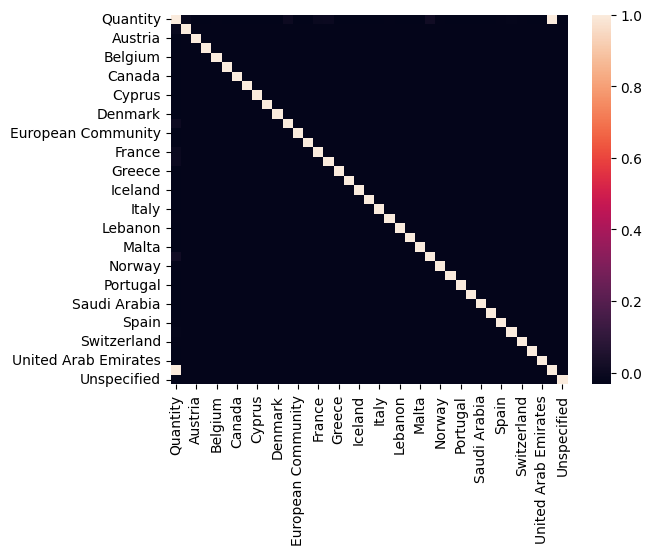

In [73]:
sb.heatmap(pais_quant_prod.drop(columns=["Country"]).corr())

Fica inviável utilizar a visualização acima, logo, não se pode concluir nada dela.

### Qual o item mais vendido e o menos vendido no país com maior volume de vendas?

In [75]:
df.head()

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Valor Total
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/01,2.55,17850.0,United Kingdom,15.30
1,536365,9,71053,WHITE METAL LANTERN,6,2010/12/01,3.39,17850.0,United Kingdom,20.34
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/01,2.75,17850.0,United Kingdom,22.00
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/01,3.39,17850.0,United Kingdom,20.34
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/01,3.39,17850.0,United Kingdom,20.34


In [78]:
pais_id_prod = df.groupby(['Country','StockCode']).sum()['Quantity'].reset_index()

In [79]:
pais_id_prod

,Country,StockCode,Quantity
0,Australia,15036,600
1,Australia,15056BL,3
2,Australia,16161P,400
3,Australia,16169E,25
4,Australia,20665,6
...,...,...,...
19834,Unspecified,85180A,2
19835,Unspecified,85180B,1
19836,Unspecified,85212,12
19837,Unspecified,85213,12


In [92]:
pais_id_prod = pais_id_prod[pais_id_prod.Country == 'United Kingdom']
pais_id_prod

,Country,StockCode,Quantity
15430,United Kingdom,10002,615
15431,United Kingdom,10080,495
15432,United Kingdom,10120,183
15433,United Kingdom,10123C,-13
15434,United Kingdom,10123G,-38
...,...,...,...
19490,United Kingdom,gift_0001_20,20
19491,United Kingdom,gift_0001_30,37
19492,United Kingdom,gift_0001_40,3
19493,United Kingdom,gift_0001_50,4


In [ ]:
pais_id_prod.drop(columns=['Country'], inplace=True)

In [97]:
pais_id_prod

,StockCode,Quantity
15430,10002,615
15431,10080,495
15432,10120,183
15433,10123C,-13
15434,10123G,-38
...,...,...
19490,gift_0001_20,20
19491,gift_0001_30,37
19492,gift_0001_40,3
19493,gift_0001_50,4


In [109]:
# Item menos vendido

pais_id_prod.sort_values(by='Quantity').iloc[0]

StockCode     23005
Quantity     -14468
Name: 17335, dtype: object

In [110]:
# Item mais vendido

pais_id_prod.sort_values(by='Quantity', ascending=False).iloc[0]

StockCode    22197
Quantity     52927
Name: 16575, dtype: object

## Extra - A partir dos números apresentados e o seu conhecimento prévio, apresente ideais/estratégias que podem ser implementadas para auxiliar nossos lojistas a aumentarem o volume de vendas?

1 - Quantidade de produtos por valor total por produto por país.

Identificar a taxa de vendas / lucros por país, para entender e ir em confronto com os resultados de só saber o volume dos itens vendidos por país.

2 - Focar nos clientes (procurar insigths)

Identificar a frequência de compra dos clientes, qual/is cliente/s mais comprou/aram por país para entender seu 'nicho' e garantir sua contínua recorrência nas compras. Como também identificar aqueles que menos comprar e entender o porquê. Tanto o que mais compra quanto o que menos compra poderiam ser agraciados com promoções/cupons de desconto para não perdê-los.